In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
image_path = '../output_videos/cropped_img.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

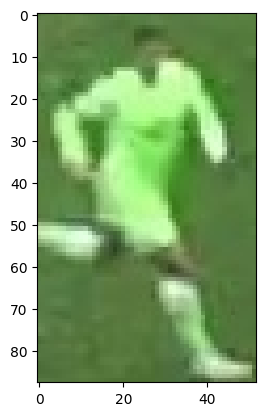

In [4]:
plt.imshow(image)
plt.show()

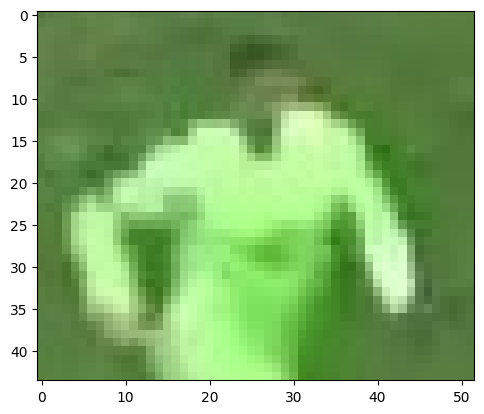

In [5]:
top_half_image = image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half_image)
plt.show()

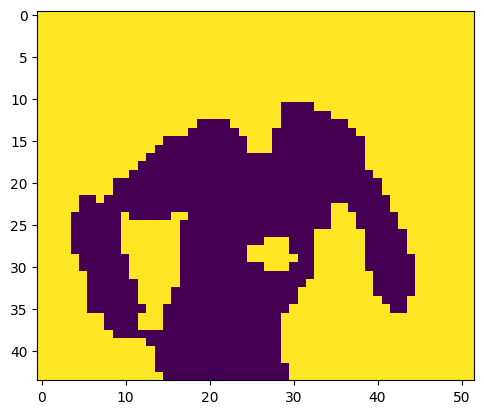

In [9]:
image_2d = top_half_image.reshape(-1, 3)

kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

labels = kmeans.labels_

clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

plt.imshow(clustered_image)
plt.show()

In [10]:
corner_cluster = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_cluster), key=corner_cluster.count)
print(non_player_cluster)

1


In [11]:
player_cluster = 1 - non_player_cluster

In [12]:
kmeans.cluster_centers_[player_cluster]

array([171.26422764, 235.80081301, 142.98102981])